This notebooks plots different pearson correlation graphs for EGFR proteomics vs other protein for the different cancers. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import re
import sys 
import math

import cptac
import cptac.utils as u

/Users/Lindsey/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# load all cptac cancers
brain = cptac.Gbm()
ccrcc = cptac.Ccrcc()
en = cptac.Endometrial()
hnscc = cptac.Hnscc()
colon = cptac.Colon()
brca = cptac.Brca()
luad = cptac.Luad()
Ovar = cptac.Ovarian()
Lscc = cptac.Lscc()

cptac warning: The GBM dataset is under publication embargo until March 01, 2021. CPTAC is a community resource project and data are made available rapidly after generation for community research use. The embargo allows exploring and utilizing the data, but analysis may not be published until after the embargo date. Please see https://proteomics.cancer.gov/data-portal/about/data-use-agreement or enter cptac.embargo() to open the webpage for more details. (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)


cptac warning: The LUAD dataset is under publication embargo until July 01, 2020. CPTAC is a community resource project and data are made available rapidly after generation for community research use. The embargo allows exploring and utilizing the data, but analysis may not be published until after the embargo date. Please see https://proteomics.cancer.gov/data-portal/about/data-use-agreement or enter cptac.embargo() to open the webpage for more details. (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 8)


In [3]:
def myTrunc(theNumber, theDigits):

    myDigits = 10 ** theDigits
    return (int(theNumber * myDigits) / myDigits)

In [21]:

def plot_lin_regression(df1,x_axis, y_axis, hue, title = "Title", ra_stats = False, show_plot = True, save_file_name = "file_name"):
    #format dfs 
    df1_subset = df1[[x_axis,y_axis,hue]]
    #df1_subset.columns = df1_subset.columns.droplevel(1)
    #def create_lin_reg_graph(df1, df2, x_axis, y_axis, title):
    df1_subset = df1_subset.dropna(axis=0, how="any")

    x1 = df1_subset[[x_axis]].values
    y1 = df1_subset[[y_axis]].values
    x1 = x1[:,0]
    y1 = y1[:,0]

    #slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x1,y1)
    corr, pval = scipy.stats.pearsonr(x1,y1)
        
    sns.set(style="darkgrid")
    plt.rcParams["figure.figsize"] = (30,22)
    graph = sns.lmplot(x= x_axis, y= y_axis, data=df1_subset, hue= hue, fit_reg=False)
    sns.regplot(x=x1, y=y1, data=df1_subset,scatter = False)
    graph.set(title = title)
   
    
    if ra_stats:
     
       
        pval = myTrunc(pval,9)
        corr = myTrunc(corr,3)
        #"Slope of regression: %s\nR-squared: %s\nPvalue: %s" %
        plt.text(2,2, "Correlation: %s\nPvalue: %s"%(corr,pval))
        
    if save_file_name != "file_name":
        
        #plt.tight_layout()
        plt.subplots_adjust(top=0.88)
        plt.savefig(save_file_name+'.png')
    if show_plot:
        plt.show()
        plt.clf()
        plt.close()
        
    
    


# Plots for EGFR and CCL20

In [5]:
prot_hnscc = hnscc.get_proteomics()
prot_gbm = brain.get_proteomics()
prot_en = en.get_proteomics()
prot_colon = colon.get_proteomics()
prot_brca = brca.get_proteomics()
prot_luad = luad.get_proteomics()
prot_ovar = Ovar.get_proteomics()
prot_ccrcc = ccrcc.get_proteomics()


# SOS1

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 193 samples for the EGFR gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)


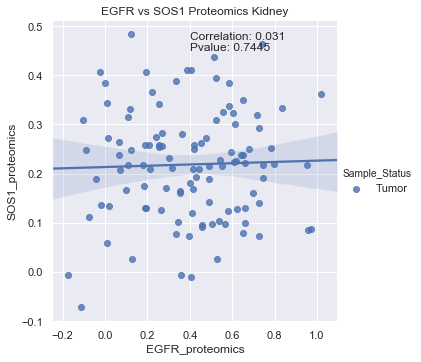

In [14]:
df1 = ccrcc.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["SOS1","EGFR"])
df1.columns = df1.columns.droplevel(1)
df1 = df1.loc[df1['Sample_Status'] == "Tumor"]
plot_lin_regression(df1,"EGFR_proteomics","SOS1_proteomics", "Sample_Status",title = "EGFR vs SOS1 Proteomics Kidney", ra_stats = True, show_plot = True)


cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 204 samples for the EGFR gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)
cptac warning: proteomics data was not found for the following samples, so proteomics data columns were filled with NaN for these samples: 01CO001, 05CO005, 05CO007, 05CO014, 05CO055, 11CO059, 11CO060, 14CO002, 16CO012, 24CO005 (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)


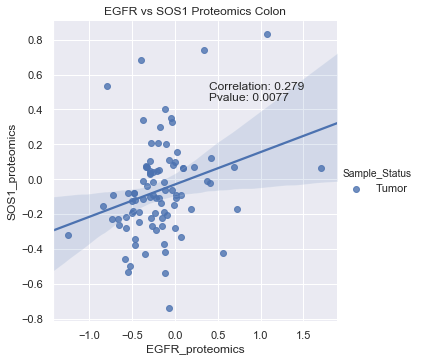

In [16]:
df1 = colon.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["SOS1","EGFR"])
#df1.columns = df1.columns.droplevel(1)
df1 = df1.loc[df1['Sample_Status'] == "Tumor"]
plot_lin_regression(df1,"EGFR_proteomics","SOS1_proteomics", "Sample_Status",title = "EGFR vs SOS1 Proteomics Colon", ra_stats = True, show_plot = True)


cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 118 samples for the EGFR gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)


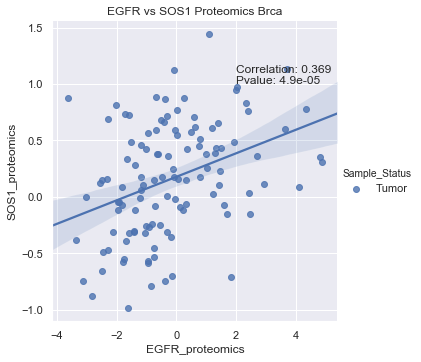

In [22]:
df1 = brca.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["SOS1","EGFR"])
df1.columns = df1.columns.droplevel(1)
df1 = df1.loc[df1['Sample_Status'] == "Tumor"]
plot_lin_regression(df1,"EGFR_proteomics","SOS1_proteomics", "Sample_Status",title = "EGFR vs SOS1 Proteomics Brca", ra_stats = True, show_plot = True)


cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 102 samples for the EGFR gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)


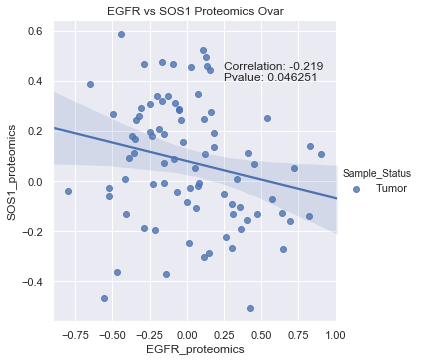

In [25]:
df1 = Ovar.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["SOS1","EGFR"])
df1.columns = df1.columns.droplevel(1)
df1 = df1.loc[df1['Sample_Status'] == "Tumor"]
plot_lin_regression(df1,"EGFR_proteomics","SOS1_proteomics", "Sample_Status",title = "EGFR vs SOS1 Proteomics Ovar", ra_stats = True, show_plot = True)


cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 204 samples for the EGFR gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)
cptac warning: proteomics data was not found for the following samples, so proteomics data columns were filled with NaN for these samples: 01CO001, 05CO005, 05CO007, 05CO014, 05CO055, 11CO059, 11CO060, 14CO002, 16CO012, 24CO005 (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)


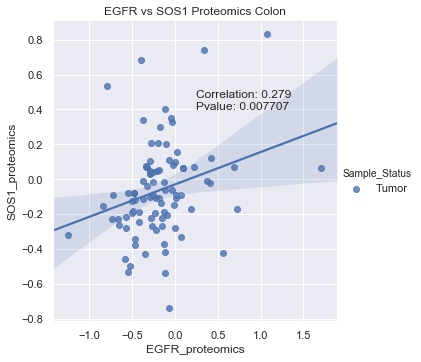

In [30]:
df1 = colon.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["SOS1","EGFR"])
#df1.columns = df1.columns.droplevel(1)
df1 = df1.loc[df1['Sample_Status'] == "Tumor"]
plot_lin_regression(df1,"EGFR_proteomics","SOS1_proteomics", "Sample_Status",title = "EGFR vs SOS1 Proteomics Colon", ra_stats = True, show_plot = True)


cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 174 samples for the EGFR gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)


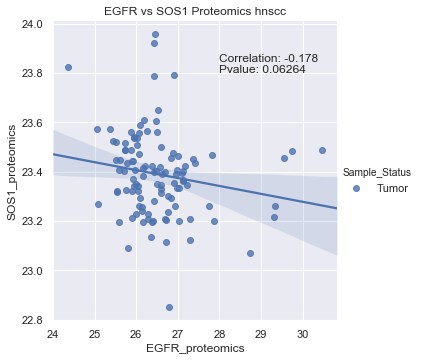

In [38]:
df1 = hnscc.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["SOS1","EGFR"])
#df1.columns = df1.columns.droplevel(1)
df1 = df1.loc[df1['Sample_Status'] == "Tumor"]
plot_lin_regression(df1,"EGFR_proteomics","SOS1_proteomics", "Sample_Status",title = "EGFR vs SOS1 Proteomics hnscc", ra_stats = True, show_plot = True)


# SHC1

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 93 samples for the EGFR gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)


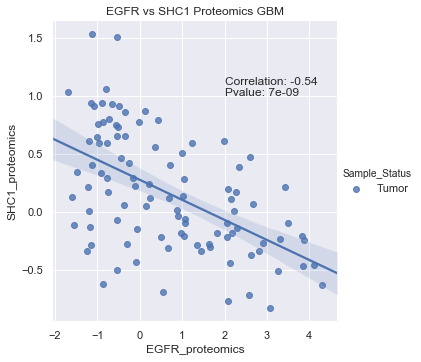

In [44]:
df1 = brain.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["SHC1","EGFR"])
#df1.columns = df1.columns.droplevel(1)
df1 = df1.loc[df1['Sample_Status'] == "Tumor"]
plot_lin_regression(df1,"EGFR_proteomics","SHC1_proteomics", "Sample_Status",title = "EGFR vs SHC1 Proteomics GBM", ra_stats = True, show_plot = True) 

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 204 samples for the EGFR gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)
cptac warning: proteomics data was not found for the following samples, so proteomics data columns were filled with NaN for these samples: 01CO001, 05CO005, 05CO007, 05CO014, 05CO055, 11CO059, 11CO060, 14CO002, 16CO012, 24CO005 (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)


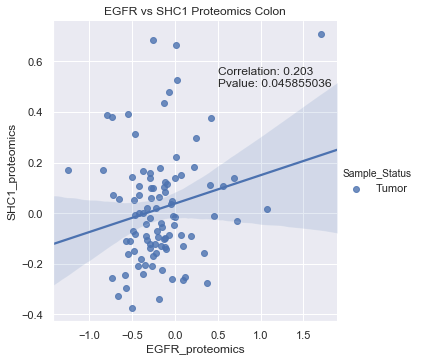

In [47]:
df1 = colon.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["SHC1","EGFR"])
#df1.columns = df1.columns.droplevel(1)
df1 = df1.loc[df1['Sample_Status'] == "Tumor"]
plot_lin_regression(df1,"EGFR_proteomics","SHC1_proteomics", "Sample_Status",title = "EGFR vs SHC1 Proteomics Colon", ra_stats = True, show_plot = True) 

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 118 samples for the EGFR gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)


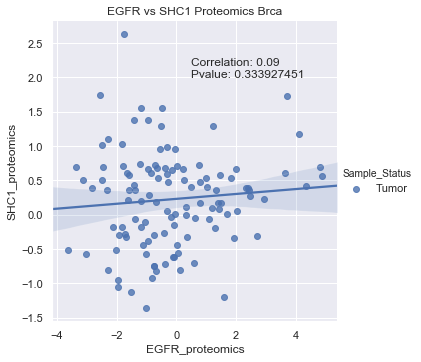

In [51]:
df1 = brca.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["SHC1","EGFR"])
df1.columns = df1.columns.droplevel(1)
df1 = df1.loc[df1['Sample_Status'] == "Tumor"]
plot_lin_regression(df1,"EGFR_proteomics","SHC1_proteomics", "Sample_Status",title = "EGFR vs SHC1 Proteomics Brca", ra_stats = True, show_plot = True) 

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 102 samples for the EGFR gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)


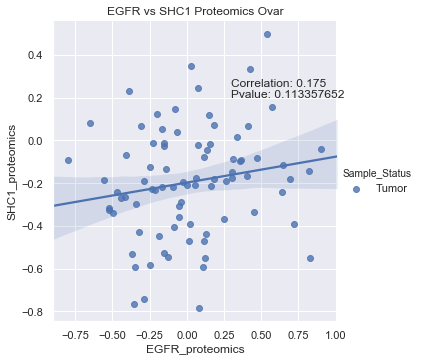

In [55]:
df1 = Ovar.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["SHC1","EGFR"])
df1.columns = df1.columns.droplevel(1)
df1 = df1.loc[df1['Sample_Status'] == "Tumor"]
plot_lin_regression(df1,"EGFR_proteomics","SHC1_proteomics", "Sample_Status",title = "EGFR vs SHC1 Proteomics Ovar", ra_stats = True, show_plot = True) 

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 174 samples for the EGFR gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)


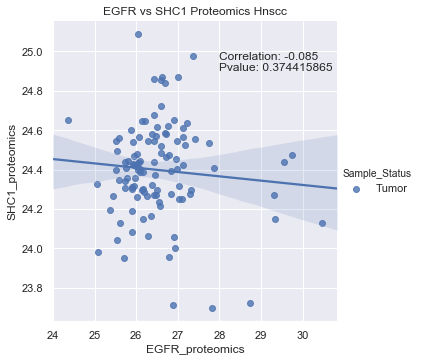

In [60]:
df1 = hnscc.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["SHC1","EGFR"])
#df1.columns = df1.columns.droplevel(1)
df1 = df1.loc[df1['Sample_Status'] == "Tumor"]
plot_lin_regression(df1,"EGFR_proteomics","SHC1_proteomics", "Sample_Status",title = "EGFR vs SHC1 Proteomics Hnscc", ra_stats = True, show_plot = True) 

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 193 samples for the EGFR gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)


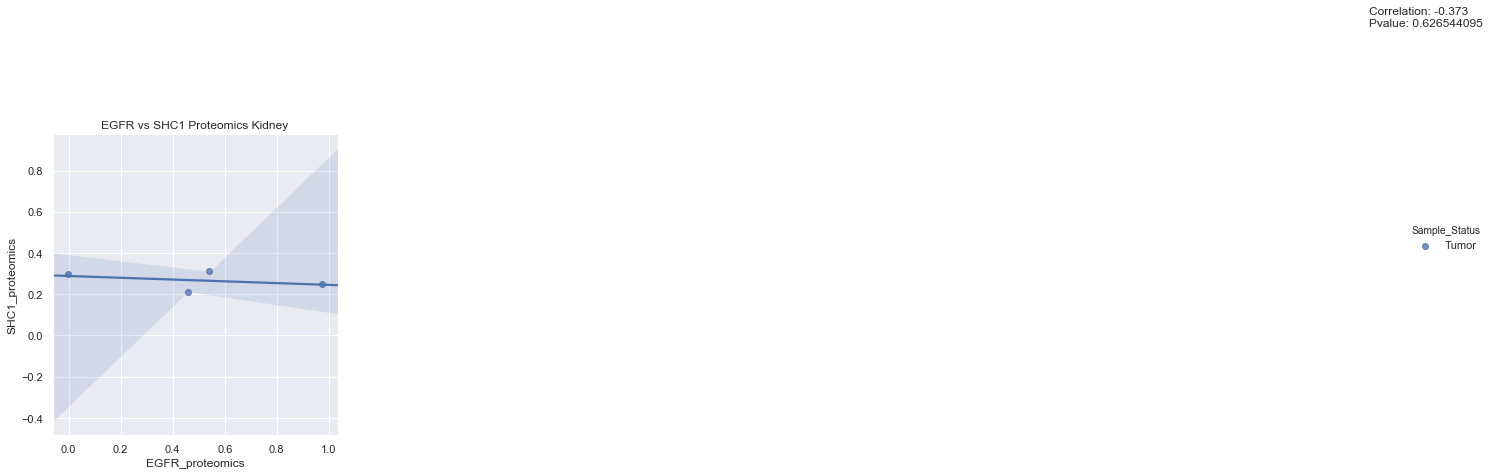

In [66]:
df1 = ccrcc.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["SHC1","EGFR"])
df1.columns = df1.columns.droplevel(1)
df1 = df1.loc[df1['Sample_Status'] == "Tumor"]
plot_lin_regression(df1,"EGFR_proteomics","SHC1_proteomics", "Sample_Status",title = "EGFR vs SHC1 Proteomics Kidney", ra_stats = True, show_plot = True) 

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 208 samples for the EGFR gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)


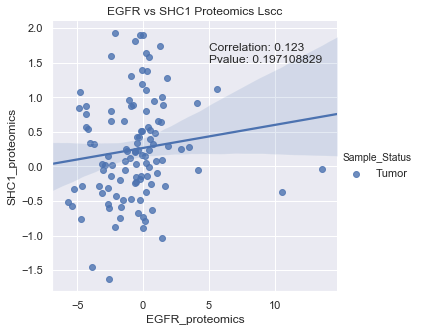

In [81]:
df1 = Lscc.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["SHC1","EGFR"])
df1.columns = df1.columns.droplevel(1)
df1 = df1.loc[df1['Sample_Status'] == "Tumor"]
plot_lin_regression(df1,"EGFR_proteomics","SHC1_proteomics", "Sample_Status",title = "EGFR vs SHC1 Proteomics Lscc", ra_stats = True, show_plot = True,  save_file_name = "EGFR_SHC1_Lscc") 

In [86]:
df1 = luad.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["SHC1","EGFR"])
df1.columns = df1.columns.droplevel(1)
df1 = df1.loc[df1['Sample_Status'] == "Tumor"]
#plot_lin_regression(df1,"EGFR_proteomics","SHC1_proteomics", "Sample_Status",title = "EGFR vs SHC1 Proteomics Luad", ra_stats = True, show_plot = True,  save_file_name = "EGFR_SHC1_Luad") 
df1

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 171 samples for the EGFR gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)


Name,EGFR_proteomics,SHC1_proteomics,SHC1_proteomics,EGFR_Mutation,EGFR_Location,EGFR_Mutation_Status,Sample_Status
Patient_ID,,,,,,,
C3L-00001,7.5892,0.1194,NaN,[Wildtype_Tumor],[No_mutation],Wildtype_Tumor,Tumor
C3L-00009,-1.8777,0.4991,NaN,[Wildtype_Tumor],[No_mutation],Wildtype_Tumor,Tumor
C3L-00080,-1.2350,0.0397,NaN,[Wildtype_Tumor],[No_mutation],Wildtype_Tumor,Tumor
C3L-00083,-2.8551,0.8242,3.1227,[Wildtype_Tumor],[No_mutation],Wildtype_Tumor,Tumor
C3L-00093,-1.9872,-1.2148,NaN,"[Missense_Mutation, Missense_Mutation]","[p.L858R, p.A871G]",Multiple_mutation,Tumor
...,...,...,...,...,...,...,...
C3N-02729,0.6061,0.0928,-0.1130,[Missense_Mutation],[p.L858R],Single_mutation,Tumor
X11LU013,5.1657,-0.0676,-0.9218,[In_Frame_Del],[p.E746_S752delinsA],Single_mutation,Tumor
X11LU016,0.6080,-0.5238,-0.4730,"[Missense_Mutation, Missense_Mutation]","[p.G719C, p.S768I]",Multiple_mutation,Tumor


cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 174 samples for the EGFR gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)


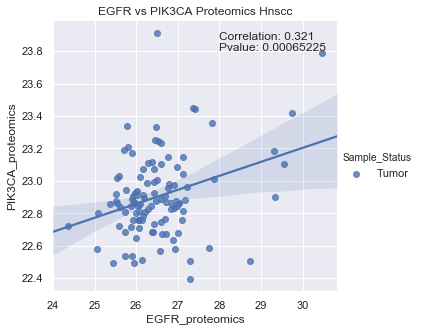

In [91]:
 df1 = hnscc.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["PIK3CA","EGFR"])
#df1.columns = df1.columns.droplevel(1)
df1 = df1.loc[df1['Sample_Status'] == "Tumor"]
plot_lin_regression(df1,"EGFR_proteomics","PIK3CA_proteomics", "Sample_Status",title = "EGFR vs PIK3CA Proteomics Hnscc", ra_stats = True, show_plot = True,  save_file_name = "EGFR_SHC1_Hnscc") 

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 171 samples for the EGFR gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)


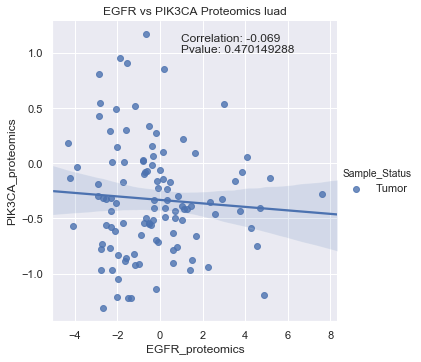

In [96]:
 df1 = luad.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["PIK3CA","EGFR"])
df1.columns = df1.columns.droplevel(1)
df1 = df1.loc[df1['Sample_Status'] == "Tumor"]
plot_lin_regression(df1,"EGFR_proteomics","PIK3CA_proteomics", "Sample_Status",title = "EGFR vs PIK3CA Proteomics luad", ra_stats = True, show_plot = True)

# RASGRP2

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 93 samples for the EGFR gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)


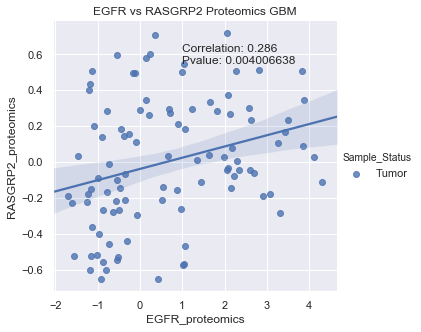

In [116]:
df1 = brain.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["RASGRP2","EGFR"])
#df1.columns = df1.columns.droplevel(1)
df1 = df1.loc[df1['Sample_Status'] == "Tumor"]
plot_lin_regression(df1,"EGFR_proteomics","RASGRP2_proteomics", "Sample_Status",title = "EGFR vs RASGRP2 Proteomics GBM", ra_stats = True, show_plot = True, save_file_name = "EGFR_RASGRP2_GBM")

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 118 samples for the EGFR gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)


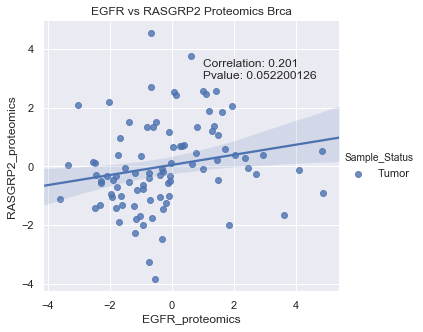

In [114]:
df1 = brca.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["RASGRP2","EGFR"])
df1.columns = df1.columns.droplevel(1)
df1 = df1.loc[df1['Sample_Status'] == "Tumor"]
plot_lin_regression(df1,"EGFR_proteomics","RASGRP2_proteomics", "Sample_Status",title = "EGFR vs RASGRP2 Proteomics Brca", ra_stats = True, show_plot = True,  save_file_name = "EGFR_RASGRP2_Brca")

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 102 samples for the EGFR gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)


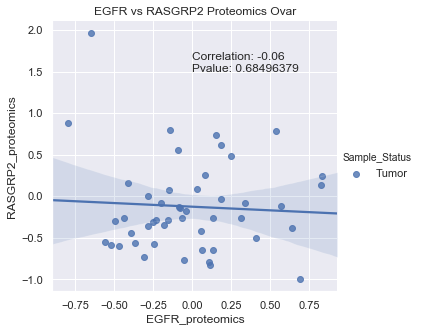

In [122]:
df1 = Ovar.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["RASGRP2","EGFR"])
df1.columns = df1.columns.droplevel(1)
df1 = df1.loc[df1['Sample_Status'] == "Tumor"]
plot_lin_regression(df1,"EGFR_proteomics","RASGRP2_proteomics", "Sample_Status",title = "EGFR vs RASGRP2 Proteomics Ovar", ra_stats = True, show_plot = True,  save_file_name = "EGFR_RASGRP2_Ovar")

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 204 samples for the EGFR gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)
cptac warning: proteomics data was not found for the following samples, so proteomics data columns were filled with NaN for these samples: 01CO001, 05CO005, 05CO007, 05CO014, 05CO055, 11CO059, 11CO060, 14CO002, 16CO012, 24CO005 (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)


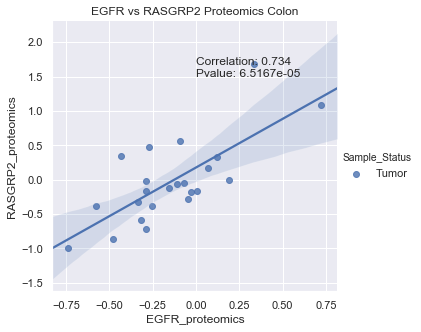

In [121]:
df1 = colon.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["RASGRP2","EGFR"])
#df1.columns = df1.columns.droplevel(1)
df1 = df1.loc[df1['Sample_Status'] == "Tumor"]
plot_lin_regression(df1,"EGFR_proteomics","RASGRP2_proteomics", "Sample_Status",title = "EGFR vs RASGRP2 Proteomics Colon", ra_stats = True, show_plot = True,  save_file_name = "EGFR_RASGRP2_Colon")

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 193 samples for the EGFR gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)


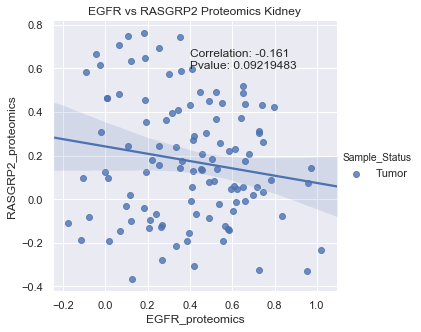

In [126]:
df1 = ccrcc.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["RASGRP2","EGFR"])
df1.columns = df1.columns.droplevel(1)
df1 = df1.loc[df1['Sample_Status'] == "Tumor"]
plot_lin_regression(df1,"EGFR_proteomics","RASGRP2_proteomics", "Sample_Status",title = "EGFR vs RASGRP2 Proteomics Kidney", ra_stats = True, show_plot = True,  save_file_name = "EGFR_RASGRP2_Kidney")

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 208 samples for the EGFR gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)


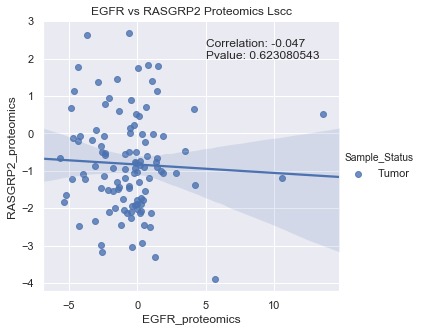

In [129]:
df1 = Lscc.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["RASGRP2","EGFR"])
df1.columns = df1.columns.droplevel(1)
df1 = df1.loc[df1['Sample_Status'] == "Tumor"]
plot_lin_regression(df1,"EGFR_proteomics","RASGRP2_proteomics", "Sample_Status",title = "EGFR vs RASGRP2 Proteomics Lscc", ra_stats = True, show_plot = True,  save_file_name = "EGFR_RASGRP2_Lscc")

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 171 samples for the EGFR gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)


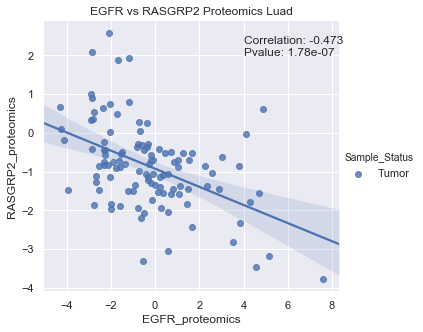

In [133]:
df1 = luad.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["RASGRP2","EGFR"])
df1.columns = df1.columns.droplevel(1)
df1 = df1.loc[df1['Sample_Status'] == "Tumor"]
plot_lin_regression(df1,"EGFR_proteomics","RASGRP2_proteomics", "Sample_Status",title = "EGFR vs RASGRP2 Proteomics Luad", ra_stats = True, show_plot = True,  save_file_name = "EGFR_RASGRP2_Luad")

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 174 samples for the EGFR gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)


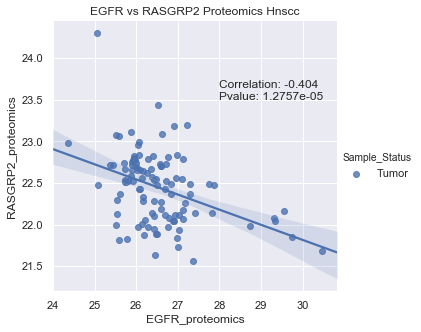

In [138]:
df1 = hnscc.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["RASGRP2","EGFR"])
#df1.columns = df1.columns.droplevel(1)
df1 = df1.loc[df1['Sample_Status'] == "Tumor"]
plot_lin_regression(df1,"EGFR_proteomics","RASGRP2_proteomics", "Sample_Status",title = "EGFR vs RASGRP2 Proteomics Hnscc", ra_stats = True, show_plot = True,  save_file_name = "EGFR_RASGRP2_Hnscc")

# RAF1

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 174 samples for the EGFR gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)


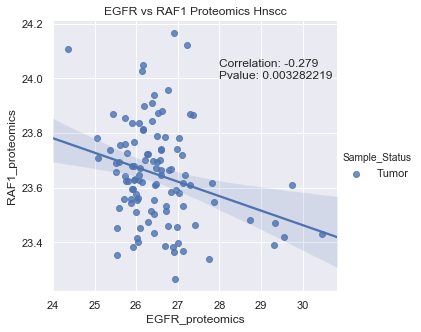

In [141]:
df1 = hnscc.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["RASGRP2","EGFR"])
#df1.columns = df1.columns.droplevel(1)
df1 = df1.loc[df1['Sample_Status'] == "Tumor"]
plot_lin_regression(df1,"EGFR_proteomics","RASGRP2_proteomics", "Sample_Status",title = "EGFR vs RASGRP2 Proteomics Hnscc", ra_stats = True, show_plot = True,  save_file_name = "EGFR_RASGRP2_Hnscc")

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 93 samples for the EGFR gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)


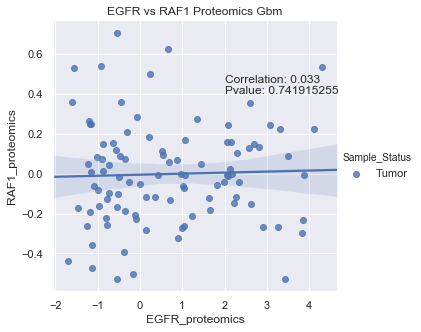

In [150]:
df1 = brain.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["RAF1","EGFR"])
#df1.columns = df1.columns.droplevel(1)
df1 = df1.loc[df1['Sample_Status'] == "Tumor"]
plot_lin_regression(df1,"EGFR_proteomics","RAF1_proteomics", "Sample_Status",title = "EGFR vs RAF1 Proteomics Gbm", ra_stats = True, show_plot = True,  save_file_name = "EGFR_RAF1_GBM")

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 118 samples for the EGFR gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)


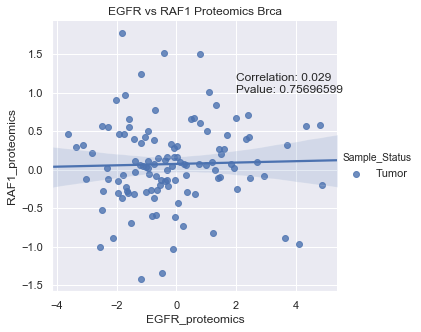

In [154]:
df1 = brca.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["RAF1","EGFR"])
df1.columns = df1.columns.droplevel(1)
df1 = df1.loc[df1['Sample_Status'] == "Tumor"]
plot_lin_regression(df1,"EGFR_proteomics","RAF1_proteomics", "Sample_Status",title = "EGFR vs RAF1 Proteomics Brca", ra_stats = True, show_plot = True,  save_file_name = "EGFR_RAF1_Brca")

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 102 samples for the EGFR gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)


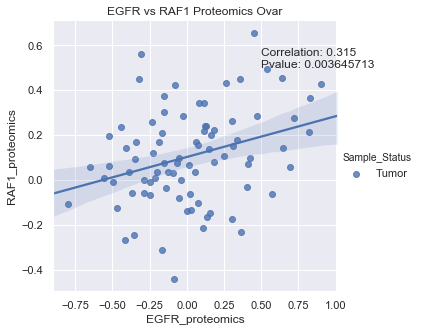

In [157]:
df1 = Ovar.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["RAF1","EGFR"])
df1.columns = df1.columns.droplevel(1)
df1 = df1.loc[df1['Sample_Status'] == "Tumor"]
plot_lin_regression(df1,"EGFR_proteomics","RAF1_proteomics", "Sample_Status",title = "EGFR vs RAF1 Proteomics Ovar", ra_stats = True, show_plot = True,  save_file_name = "EGFR_RAF1_Ovar")

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 204 samples for the EGFR gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)
cptac warning: proteomics data was not found for the following samples, so proteomics data columns were filled with NaN for these samples: 01CO001, 05CO005, 05CO007, 05CO014, 05CO055, 11CO059, 11CO060, 14CO002, 16CO012, 24CO005 (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)


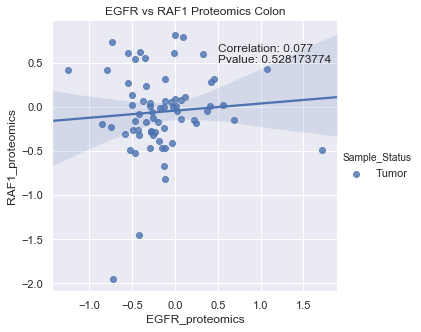

In [158]:
df1 = colon.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["RAF1","EGFR"])
#df1.columns = df1.columns.droplevel(1)
df1 = df1.loc[df1['Sample_Status'] == "Tumor"]
plot_lin_regression(df1,"EGFR_proteomics","RAF1_proteomics", "Sample_Status",title = "EGFR vs RAF1 Proteomics Colon", ra_stats = True, show_plot = True,  save_file_name = "EGFR_RAF1_Colon")

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 193 samples for the EGFR gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)


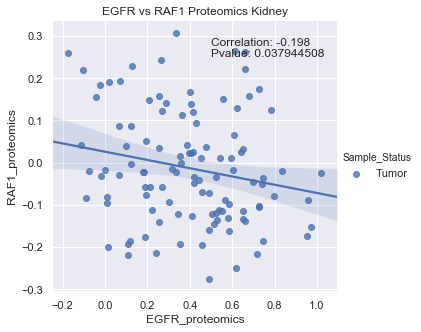

In [163]:
df1 = ccrcc.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["RAF1","EGFR"])
df1.columns = df1.columns.droplevel(1)
df1 = df1.loc[df1['Sample_Status'] == "Tumor"]

plot_lin_regression(df1,"EGFR_proteomics","RAF1_proteomics", "Sample_Status",title = "EGFR vs RAF1 Proteomics Kidney", ra_stats = True, show_plot = True,  save_file_name = "EGFR_RAF1_Kidney")

In [172]:
df1 = luad.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["RAF1","EGFR"])
df1.columns = df1.columns.droplevel(1)
df1 = df1.loc[df1['Sample_Status'] == "Tumor"]

df1
#plot_lin_regression(df1,"EGFR_proteomics","RAF1_proteomics", "Sample_Status",title = "EGFR vs RAF1 Proteomics Luad", ra_stats = True, show_plot = True,  save_file_name = "EGFR_RAF1_Luad")

cptac warning: The following columns were not found in the proteomics dataframe, so they were inserted into joined table, but filled with NaN: RAF1 (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)
cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 171 samples for the EGFR gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)


Name,EGFR_proteomics,RAF1_proteomics,EGFR_Mutation,EGFR_Location,EGFR_Mutation_Status,Sample_Status
Patient_ID,,,,,,
C3L-00001,7.5892,NaN,[Wildtype_Tumor],[No_mutation],Wildtype_Tumor,Tumor
C3L-00009,-1.8777,NaN,[Wildtype_Tumor],[No_mutation],Wildtype_Tumor,Tumor
C3L-00080,-1.2350,NaN,[Wildtype_Tumor],[No_mutation],Wildtype_Tumor,Tumor
C3L-00083,-2.8551,NaN,[Wildtype_Tumor],[No_mutation],Wildtype_Tumor,Tumor
C3L-00093,-1.9872,NaN,"[Missense_Mutation, Missense_Mutation]","[p.L858R, p.A871G]",Multiple_mutation,Tumor
...,...,...,...,...,...,...
C3N-02729,0.6061,NaN,[Missense_Mutation],[p.L858R],Single_mutation,Tumor
X11LU013,5.1657,NaN,[In_Frame_Del],[p.E746_S752delinsA],Single_mutation,Tumor
X11LU016,0.6080,NaN,"[Missense_Mutation, Missense_Mutation]","[p.G719C, p.S768I]",Multiple_mutation,Tumor


cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 174 samples for the EGFR gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)


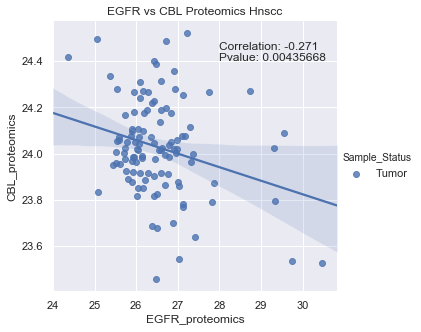

In [201]:
df1 = hnscc.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["CBL","EGFR"])
#df1.columns = df1.columns.droplevel(1)
df1 = df1.loc[df1['Sample_Status'] == "Tumor"]


plot_lin_regression(df1,"EGFR_proteomics","CBL_proteomics", "Sample_Status",title = "EGFR vs CBL Proteomics Hnscc", ra_stats = True, show_plot = True, save_file_name = "EGFR_CBL_Hnscc")

# VAV 1

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 93 samples for the EGFR gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)


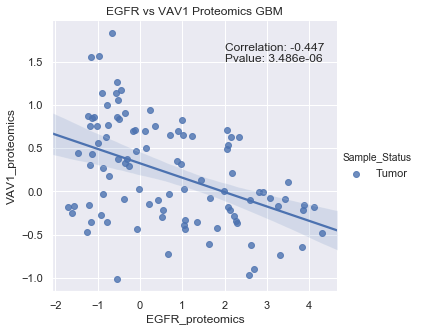

In [204]:
df1 = brain.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["VAV1","EGFR"])
#df1.columns = df1.columns.droplevel(1)
df1 = df1.loc[df1['Sample_Status'] == "Tumor"]


plot_lin_regression(df1,"EGFR_proteomics","VAV1_proteomics", "Sample_Status",title = "EGFR vs VAV1 Proteomics GBM", ra_stats = True, show_plot = True, save_file_name = "EGFR_VAV1_GBM")

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 204 samples for the EGFR gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)
cptac warning: proteomics data was not found for the following samples, so proteomics data columns were filled with NaN for these samples: 01CO001, 05CO005, 05CO007, 05CO014, 05CO055, 11CO059, 11CO060, 14CO002, 16CO012, 24CO005 (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)


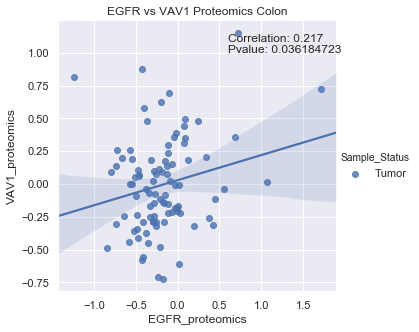

In [223]:
df1 = colon.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["VAV1","EGFR"])
#df1.columns = df1.columns.droplevel(1)
df1 = df1.loc[df1['Sample_Status'] == "Tumor"]


plot_lin_regression(df1,"EGFR_proteomics","VAV1_proteomics", "Sample_Status",title = "EGFR vs VAV1 Proteomics Colon", ra_stats = True, show_plot = True, save_file_name = "EGFR_VAV1_Colon")

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 174 samples for the EGFR gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)


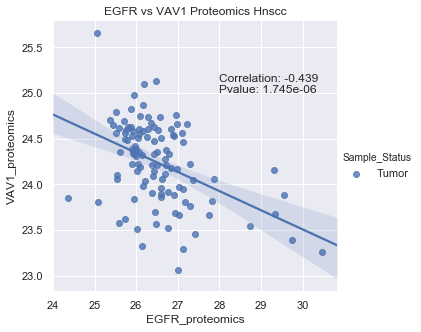

In [236]:
df1 = hnscc.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["VAV1","EGFR"])
#df1.columns = df1.columns.droplevel(1)
df1 = df1.loc[df1['Sample_Status'] == "Tumor"]


plot_lin_regression(df1,"EGFR_proteomics","VAV1_proteomics", "Sample_Status",title = "EGFR vs VAV1 Proteomics Hnscc", ra_stats = True, show_plot = True, save_file_name = "EGFR_VAV1_Hnscc")

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 204 samples for the EGFR gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)
cptac warning: proteomics data was not found for the following samples, so proteomics data columns were filled with NaN for these samples: 01CO001, 05CO005, 05CO007, 05CO014, 05CO055, 11CO059, 11CO060, 14CO002, 16CO012, 24CO005 (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)


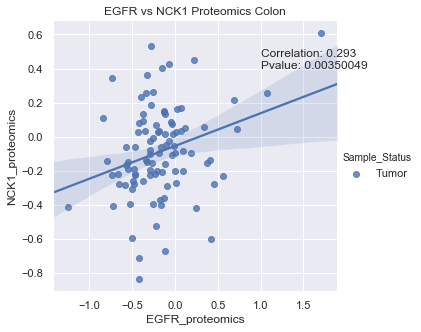

In [256]:
df1 = colon.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["NCK1","EGFR"])
#df1.columns = df1.columns.droplevel(1)
df1 = df1.loc[df1['Sample_Status'] == "Tumor"]


plot_lin_regression(df1,"EGFR_proteomics","NCK1_proteomics", "Sample_Status",title = "EGFR vs NCK1 Proteomics Colon", ra_stats = True, show_plot = True,save_file_name = "EGFR_NCK1_Colon")

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 118 samples for the EGFR gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)


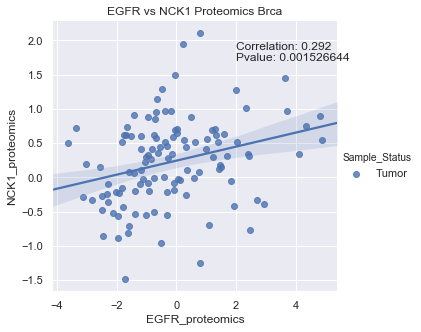

In [254]:
df1 = brca.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["NCK1","EGFR"])
df1.columns = df1.columns.droplevel(1)
df1 = df1.loc[df1['Sample_Status'] == "Tumor"]


plot_lin_regression(df1,"EGFR_proteomics","NCK1_proteomics", "Sample_Status",title = "EGFR vs NCK1 Proteomics Brca", ra_stats = True, show_plot = True,save_file_name = "EGFR_NCK1_Brca")

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 174 samples for the EGFR gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)


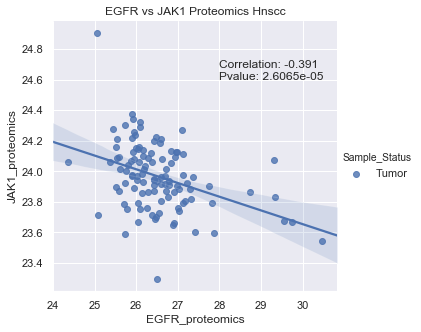

In [268]:
df1 = hnscc.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["JAK1","EGFR"])
#df1.columns = df1.columns.droplevel(1)
df1 = df1.loc[df1['Sample_Status'] == "Tumor"]


plot_lin_regression(df1,"EGFR_proteomics","JAK1_proteomics", "Sample_Status",title = "EGFR vs JAK1 Proteomics Hnscc", ra_stats = True, show_plot = True,save_file_name = "EGFR_JAK1_Hnscc")

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 193 samples for the EGFR gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)


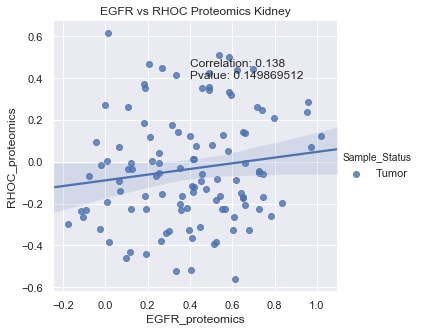

In [302]:
df1 = ccrcc.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["RHOC","EGFR"])
df1.columns = df1.columns.droplevel(1)
df1 = df1.loc[df1['Sample_Status'] == "Tumor"]

df1
plot_lin_regression(df1,"EGFR_proteomics","RHOC_proteomics", "Sample_Status",title = "EGFR vs RHOC Proteomics Kidney", ra_stats = True, show_plot = True,save_file_name = "EGFR_RHOC_Kidney")

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 174 samples for the EGFR gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)


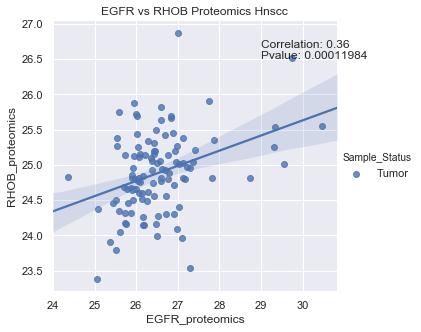

In [307]:
df1 = hnscc.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["RHOB","EGFR"])
#df1.columns = df1.columns.droplevel(1)
df1 = df1.loc[df1['Sample_Status'] == "Tumor"]

df1
plot_lin_regression(df1,"EGFR_proteomics","RHOB_proteomics", "Sample_Status",title = "EGFR vs RHOB Proteomics Hnscc", ra_stats = True, show_plot = True,save_file_name = "EGFR_RHOB_Hnscc")

In [311]:
df1 = luad.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["STAT3","EGFR"])
df1.columns = df1.columns.droplevel(1)
df1 = df1.loc[df1['Sample_Status'] == "Tumor"]

df1
#plot_lin_regression(df1,"EGFR_proteomics","STAT3_proteomics", "Sample_Status",title = "EGFR vs RHOB Proteomics Hnscc", ra_stats = True, show_plot = True)

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 171 samples for the EGFR gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)


Name,EGFR_proteomics,STAT3_proteomics,STAT3_proteomics,EGFR_Mutation,EGFR_Location,EGFR_Mutation_Status,Sample_Status
Patient_ID,,,,,,,
C3L-00001,7.5892,-0.4392,1.1355,[Wildtype_Tumor],[No_mutation],Wildtype_Tumor,Tumor
C3L-00009,-1.8777,0.5520,0.9185,[Wildtype_Tumor],[No_mutation],Wildtype_Tumor,Tumor
C3L-00080,-1.2350,1.3685,2.2030,[Wildtype_Tumor],[No_mutation],Wildtype_Tumor,Tumor
C3L-00083,-2.8551,-0.0770,-0.2093,[Wildtype_Tumor],[No_mutation],Wildtype_Tumor,Tumor
C3L-00093,-1.9872,0.3548,0.7552,"[Missense_Mutation, Missense_Mutation]","[p.L858R, p.A871G]",Multiple_mutation,Tumor
...,...,...,...,...,...,...,...
C3N-02729,0.6061,1.3481,1.8970,[Missense_Mutation],[p.L858R],Single_mutation,Tumor
X11LU013,5.1657,-0.2791,-0.1110,[In_Frame_Del],[p.E746_S752delinsA],Single_mutation,Tumor
X11LU016,0.6080,0.1959,1.0200,"[Missense_Mutation, Missense_Mutation]","[p.G719C, p.S768I]",Multiple_mutation,Tumor


In [ ]:
df1 = ccrcc.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["VAV1","EGFR"])
df1.columns = df1.columns.droplevel(1)
df1 = df1.loc[df1['Sample_Status'] == "Tumor"]


plot_lin_regression(df1,"EGFR_proteomics","VAV1_proteomics", "Sample_Status",title = "EGFR vs VAV1 Proteomics Kidney", ra_stats = True, show_plot = True, save_file_name = "EGFR_VAV1_kidney")

In [ ]:
df1 = luad.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["PPP2R3A","EGFR"])
df1.columns = df1.columns.droplevel(1)
df1 = df1.loc[df1['Sample_Status'] == "Tumor"]
df1
plot_lin_regression(df1,"EGFR_proteomics","PPP2R3A_proteomics", "Sample_Status",title = "EGFR vs PPP2R3A Proteomics Luad", ra_stats = True, show_plot = True)

In [ ]:
df1 = ccrcc.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["PPP2R3A","EGFR"])
df1.columns = df1.columns.droplevel(1)
df1 = df1.loc[df1['Sample_Status'] == "Tumor"]
df1
plot_lin_regression(df1,"EGFR_proteomics","PPP2R3A_proteomics", "Sample_Status",title = "EGFR vs PPP2R3A Proteomics Kidney", ra_stats = True, show_plot = True)

In [ ]:
df1 = brca.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["PPP2R3A","EGFR"])
df1.columns = df1.columns.droplevel(1)
df1 = df1.loc[df1['Sample_Status'] == "Tumor"]
df1
plot_lin_regression(df1,"EGFR_proteomics","PPP2R3A_proteomics", "Sample_Status",title = "EGFR vs PPP2R3A Proteomics Brca", ra_stats = True, show_plot = True)

In [ ]:
df1 = ccrcc.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["PPP2R3A","EGFR"])
df1.columns = df1.columns.droplevel(1)
df1 = df1.loc[df1['Sample_Status'] == "Tumor"]
df1
plot_lin_regression(df1,"EGFR_proteomics","PPP2R3A_proteomics", "Sample_Status",title = "EGFR vs PPP2R3A Proteomics Ovarian", ra_stats = True, show_plot = True)

In [ ]:
df1 = brain.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["CXCL8","EGFR"])
#df1.columns = df1.columns.droplevel(1)
df1 = df1.loc[df1['Sample_Status'] == "Tumor"]
plot_lin_regression(df1,"EGFR_proteomics","CXCL8_proteomics", "Sample_Status",title = "CXCL8 vs EGFR Proteomics GBM", ra_stats = True, show_plot = True)

In [ ]:
df1 = brain.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["GRB2","EGFR"])
#df1.columns = df1.columns.droplevel(1)
df1 = df1.loc[df1['Sample_Status'] == "Tumor"]
plot_lin_regression(df1,"EGFR_proteomics","GRB2_proteomics", "Sample_Status",title = "EGFR vs GRB2 Proteomics GBM", ra_stats = True, show_plot = True)

In [ ]:
df1 = luad.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["GRB2","EGFR"])
df1.columns = df1.columns.droplevel(1)
df1 = df1.loc[df1['Sample_Status'] == "Tumor"]
plot_lin_regression(df1,"EGFR_proteomics","GRB2_proteomics", "Sample_Status",title = "EGFR vs GRB2 Proteomics Luad", ra_stats = True, show_plot = True)

In [ ]:
df1 = brca.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["GRB2","EGFR"])
df1.columns = df1.columns.droplevel(1)
df1 = df1.loc[df1['Sample_Status'] == "Tumor"]
plot_lin_regression(df1,"EGFR_proteomics","GRB2_proteomics", "Sample_Status",title = "EGFR vs GRB2 Proteomics BRCA", ra_stats = True, show_plot = True)

In [ ]:
df1 = Ovar.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["GRB2","EGFR"])
df1.columns = df1.columns.droplevel(1)
df1 = df1.loc[df1['Sample_Status'] == "Tumor"]
plot_lin_regression(df1,"EGFR_proteomics","GRB2_proteomics", "Sample_Status",title = "EGFR vs GRB2 Proteomics Ovar", ra_stats = True, show_plot = True)

In [ ]:
df1 = hnscc.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["GRB2","EGFR"])
#df1.columns = df1.columns.droplevel(1)
df1 = df1.loc[df1['Sample_Status'] == "Tumor"]
plot_lin_regression(df1,"EGFR_proteomics","GRB2_proteomics", "Sample_Status",title = "EGFR vs GRB2 Proteomics hnscc", ra_stats = True, show_plot = True)

In [ ]:
df1 = luad.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["GRB2","EGFR"])
df1.columns = df1.columns.droplevel(1)
df1 = df1.loc[df1['Sample_Status'] == "Tumor"]
plot_lin_regression(df1,"EGFR_proteomics","GRB2_proteomics", "Sample_Status",title = "EGFR vs GRB2 Proteomics luad", ra_stats = True, show_plot = True)

In [ ]:
df1 = colon.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["GRB2","EGFR"])
#df1.columns = df1.columns.droplevel(1)
df1 = df1.loc[df1['Sample_Status'] == "Tumor"]
plot_lin_regression(df1,"EGFR_proteomics","GRB2_proteomics", "Sample_Status",title = "EGFR vs GRB2 Proteomics colon", ra_stats = True, show_plot = True)


In [ ]:
df1 = hnscc.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["CYP1B1","EGFR"])
#df1.columns = df1.columns.droplevel(1)
df1 = df1.loc[df1['Sample_Status'] == "Tumor"]
plot_lin_regression(df1,"EGFR_proteomics","CYP1B1_proteomics", "Sample_Status",title = "EGFR vs CYP1B1 Proteomics hnscc", ra_stats = True, show_plot = True)

In [ ]:
df1 = hnscc.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["CDH17","EGFR"])
#df1.columns = df1.columns.droplevel(1)
df1 = df1.loc[df1['Sample_Status'] == "Tumor"]

plot_lin_regression(df1,"EGFR_proteomics","CDH17_proteomics", "Sample_Status",title = "EGFR vs CDH17 Proteomics hnscc", ra_stats = True, show_plot = True)

In [ ]:
df1 = colon.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["RASGRP2","EGFR"])
#df1.columns = df1.columns.droplevel(1)
df1 = df1.loc[df1['Sample_Status'] == "Tumor"]

plot_lin_regression(df1,"EGFR_proteomics","RASGRP2_proteomics", "Sample_Status",title = "EGFR vs RASGRP2 Proteomics colon", ra_stats = True, show_plot = True)

In [ ]:
df1 = brain.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["RASGRP2","EGFR"])
#df1.columns = df1.columns.droplevel(1)
df1 = df1.loc[df1['Sample_Status'] == "Tumor"]

plot_lin_regression(df1,"EGFR_proteomics","RASGRP2_proteomics", "Sample_Status",title = "EGFR vs RASGRP2 Proteomics GBM", ra_stats = True, show_plot = True)

In [ ]:
df1 = luad.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["RASGRP2","EGFR"])
df1.columns = df1.columns.droplevel(1)
df1 = df1.loc[df1['Sample_Status'] == "Tumor"]

plot_lin_regression(df1,"EGFR_proteomics","RASGRP2_proteomics", "Sample_Status",title = "EGFR vs RASGRP2 Proteomics Luad", ra_stats = True, show_plot = True)

In [ ]:
df1 = ccrcc.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["RASGRP2","EGFR"])
df1.columns = df1.columns.droplevel(1)
df1 = df1.loc[df1['Sample_Status'] == "Tumor"]

plot_lin_regression(df1,"EGFR_proteomics","RASGRP2_proteomics", "Sample_Status",title = "EGFR vs RASGRP2 Proteomics kidney", ra_stats = True, show_plot = True)

In [ ]:
df1 = hnscc.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["RASGRP2","EGFR"])
#df1.columns = df1.columns.droplevel(1)
df1 = df1.loc[df1['Sample_Status'] == "Tumor"]

plot_lin_regression(df1,"EGFR_proteomics","RASGRP2_proteomics", "Sample_Status",title = "EGFR vs RASGRP2 Proteomics Hnscc", ra_stats = True, show_plot = True)

In [ ]:
df1 = brca.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["RASGRP2","EGFR"])
df1.columns = df1.columns.droplevel(1)
df1 = df1.loc[df1['Sample_Status'] == "Tumor"]

plot_lin_regression(df1,"EGFR_proteomics","RASGRP2_proteomics", "Sample_Status",title = "EGFR vs RASGRP2 Proteomics Brca", ra_stats = True, show_plot = True)

In [ ]:
df1 = Ovar.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["RASGRP2","EGFR"])
df1.columns = df1.columns.droplevel(1)
df1 = df1.loc[df1['Sample_Status'] == "Tumor"]

plot_lin_regression(df1,"EGFR_proteomics","RASGRP2_proteomics", "Sample_Status",title = "EGFR vs RASGRP2 Proteomics Ovar", ra_stats = True, show_plot = True)

In [ ]:
df1 = Ocar.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["PPM1B","EGFR"])
df1.columns = df1.columns.droplevel(1)
df1 = df1.loc[df1['Sample_Status'] == "Tumor"]
df1
#plot_lin_regression(df1,"EGFR_proteomics","PPM1B_proteomics", "Sample_Status",title = "EGFR vs PPM1B Proteomics Ccrcc", ra_stats = False, show_plot = True)

In [ ]:
df1 = ccrcc.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["PLCB1","EGFR"])
df1.columns = df1.columns.droplevel(1)
df1 = df1.loc[df1['Sample_Status'] == "Tumor"]
df1
plot_lin_regression(df1,"EGFR_proteomics","PLCB1_proteomics", "Sample_Status",title = "EGFR vs PLCB1 Proteomics Ccrcc", ra_stats = True, show_plot = True)

In [ ]:
df1 = hnscc.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["PLCB1","EGFR"])
#df1.columns = df1.columns.droplevel(1)
df1 = df1.loc[df1['Sample_Status'] == "Tumor"]
df1
plot_lin_regression(df1,"EGFR_proteomics","PLCB1_proteomics", "Sample_Status",title = "EGFR vs PLCB1 Proteomics hnscc", ra_stats = True, show_plot = True)

In [ ]:
df1 = Ovar.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["ULK1","EGFR"])
df1.columns = df1.columns.droplevel(1)
df1 = df1.loc[df1['Sample_Status'] == "Tumor"]
plot_lin_regression(df1,"EGFR_proteomics","ULK1_proteomics", "Sample_Status",title = "EGFR vs ULK1 Proteomics Ovar", ra_stats = True, show_plot = True)


In [ ]:
df1 = brain.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["ULK1","EGFR"])
#df1.columns = df1.columns.droplevel(1)
df1 = df1.loc[df1['Sample_Status'] == "Tumor"]
plot_lin_regression(df1,"EGFR_proteomics","ULK1_proteomics", "Sample_Status",title = "EGFR vs ULK1 Proteomics GBM", ra_stats = True, show_plot = True)


In [ ]:
df1 = ccrcc.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["ULK1","EGFR"])
df1.columns = df1.columns.droplevel(1)
df1 = df1.loc[df1['Sample_Status'] == "Tumor"]
plot_lin_regression(df1,"EGFR_proteomics","ULK1_proteomics", "Sample_Status",title = "EGFR vs ULK1 Proteomics Kidney", ra_stats = True, show_plot = True)


In [ ]:
df1 = brca.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["ULK1","EGFR"])
df1.columns = df1.columns.droplevel(1)
df1 = df1.loc[df1['Sample_Status'] == "Tumor"]
plot_lin_regression(df1,"EGFR_proteomics","ULK1_proteomics", "Sample_Status",title = "EGFR vs ULK1 Proteomics Brca", ra_stats = True, show_plot = True)


In [ ]:
plot_lin_regression(prot_hnscc,"EGFR","MAPT","EGFR vs MAPT Proteomics hnscc", ra_stats = True, show_plot = True)

In [ ]:
plot_lin_regression(prot_luad,"EGFR","MAPT","EGFR vs MAPT Proteomics luad", ra_stats = True, show_plot = True)

In [ ]:
plot_lin_regression(prot_gbm,"EGFR","NCOA1","EGFR vs NCOA1 Proteomics gbm", ra_stats = True, show_plot = True)

In [ ]:
plot_lin_regression(prot_ccrcc,"EGFR","NCOA1","EGFR vs NCOA1 Proteomics Ccrcc", ra_stats = True, show_plot = True)

In [ ]:
plot_lin_regression(prot_en,"EGFR","NCOA1","EGFR vs NCOA1 Proteomics Endo", ra_stats = True, show_plot = True)

In [ ]:
plot_lin_regression(prot_ovar,"EGFR","NCOA1","EGFR vs NCOA1 Proteomics Ovar", ra_stats = True, show_plot = True)

In [ ]:
plot_lin_regression(prot_brca,"EGFR","NCOA1","EGFR vs NCOA1 Proteomics Brca", ra_stats = True, show_plot = True)

In [ ]:
plot_lin_regression(prot_luad,"EGFR","NCOA1","EGFR vs NCOA1 Proteomics luad", ra_stats = True, show_plot = True)

In [ ]:
df1 = brain.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["GRB2","EGFR"])
#df1.columns = df1.columns.droplevel(1)
df1 = df1.loc[df1['Sample_Status'] == "Tumor"]
plot_lin_regression(df1,"EGFR_proteomics","GRB2_proteomics", "Sample_Status",title = "EGFR vs GRB2 Proteomics GBM", ra_stats = True, show_plot = True)


In [ ]:
df1 = Ccrcc.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["GRB2","EGFR"])
df1.columns = df1.columns.droplevel(1)
plot_lin_regression(df1,"EGFR_proteomics","GRB2_proteomics", "Sample_Status",title = "EGFR vs GRB2 Proteomics Kidney", ra_stats = True, show_plot = True)

In [ ]:
df1 = luad.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["GRB2","EGFR"])
df1.columns = df1.columns.droplevel(1)
plot_lin_regression(df1,"EGFR_proteomics","GRB2_proteomics", "Sample_Status",title = "EGFR vs GRB2 Proteomics Luad", ra_stats = True, show_plot = True)


In [ ]:
df1 = hnscc.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["MAPT","EGFR"])
#df1.columns = df1.columns.droplevel(1)
plot_lin_regression(df1,"EGFR_proteomics","MAPT_proteomics", "Sample_Status",title = "EGFR vs MAPT Proteomics Hnscc", ra_stats = True, show_plot = True)

In [ ]:
df1_subset = df1[["EGFR_proteomics","NCOA1_proteomics","Sample_Status"]]
df1_subset.columns = df1_subset.columns.droplevel(1)
#def create_lin_reg_graph(df1, df2, x_axis, y_axis, title):
df1_subset = df1_subset.dropna(axis=0, how="any")

x1 = df1_subset[["EGFR_proteomics"]].values
y1 = df1_subset[["NCOA1_proteomics"]].values
x1 = x1[:,0]
y1 = y1[:,0]

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x1,y1)
    

sns.set(style="darkgrid")
plt.rcParams["figure.figsize"] = (10,8)
graph = sns.lmplot(x= "EGFR_proteomics", y="NCOA1_proteomics", data=df1_subset, hue="Sample_Status", fit_reg=False)
sns.regplot(x=x1, y=y1, data=df1_subset,scatter = False)
graph.set(title = "EGFR vs NCOA1 Proteomics Ccrcc")
plt.show()
plt.clf()
plt.close()



#plot_lin_regression(EGFR_prot_mut,"EGFR_proteomics","NCOA1_proteomics","EGFR vs NCOA1 Proteomics Hnscc", ra_stats = True, show_plot = True)

In [ ]:
df1_subset

In [ ]:
df1 = Ccrcc.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["NCOA1","EGFR"])

df1.columns = df1.columns.droplevel(1)
plot_lin_regression(df1,"EGFR_proteomics","NCOA1_proteomics", "Sample_Status",title = "EGFR vs NCOA1 Proteomics Kidney", ra_stats = True, show_plot = True)

In [ ]:
df1 = colon.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["MAPT","EGFR"])
#df1.columns = df1.columns.droplevel(1)
plot_lin_regression(df1,"EGFR_proteomics","MAPT_proteomics", "Sample_Status",title = "EGFR vs MAPT Proteomics Colon", ra_stats = True, show_plot = True)

In [ ]:
df1 = hnscc.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["MAPT","EGFR"])
#df1.columns = df1.columns.droplevel(1)
df1_tumor = df1.loc[df1['Sample_Status'] == "Tumor"]
df1_tumor
plot_lin_regression(df1_tumor,"EGFR_proteomics","MAPT_proteomics", "Sample_Status",title = "EGFR vs MAPT Proteomics Hnscc", ra_stats = True, show_plot = True)

In [ ]:
df1 = luad.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["GRB2","EGFR"])
df1.columns = df1.columns.droplevel(1)
df1
#plot_lin_regression(df1,"EGFR_proteomics","GRB2_proteomics", "Sample_Status",title = "EGFR vs GRB2 Proteomics Luad", ra_stats = True, show_plot = True)

In [ ]:
df1 = Ovar.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["GRB2","EGFR"])
df1.columns = df1.columns.droplevel(1)
plot_lin_regression(df1,"EGFR_proteomics","GRB2_proteomics", "Sample_Status",title = "EGFR vs GRB2 Proteomics Ovar", ra_stats = True, show_plot = True)

In [ ]:
df1 = hnscc.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["GRB2","EGFR"])
#df1.columns = df1.columns.droplevel(1)
plot_lin_regression(df1,"EGFR_proteomics","GRB2_proteomics", "Sample_Status",title = "EGFR vs GRB2 Proteomics hnscc", ra_stats = True, show_plot = True)

In [ ]:

#df1.columns = df1.columns.droplevel(1)
plot_lin_regression(df1,"EGFR_proteomics","GRB2_proteomics", "Sample_Status",title = "EGFR vs GRB2 Proteomics Colon", ra_stats = True, show_plot = True)

In [ ]:
df1 = Ccrcc.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["MAPT","EGFR"])
df1.columns = df1.columns.droplevel(1)
df1
#plot_lin_regression(df1,"EGFR_proteomics","MAPT_proteomics", "Sample_Status",title = "EGFR vs MAPT Proteomics Ccrcc", ra_stats = True, show_plot = True)